# Classifier Training

In [2]:
from training import train

train(
    sample_size = None,
    color_space = 'YCrCb', # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
    orient = 9,  # HOG orientations
    pix_per_cell = 8, # HOG pixels per cell
    cell_per_block = 2, # HOG cells per block
    hog_channel = "ALL", # Can be 0, 1, 2, or "ALL"
    spatial_size = (16, 16), # Spatial binning dimensions
    hist_bins = 16,    # Number of histogram bins
    hist_range = (0, 1),
    spatial_feat = False, # Spatial features on or off
    hist_feat = True, # Histogram features on or off
    hog_feat = True # HOG features on or off
)

Extracting features: 1000/8792
Extracting features: 2000/8792
Extracting features: 3000/8792
Extracting features: 4000/8792
Extracting features: 5000/8792
Extracting features: 6000/8792
Extracting features: 7000/8792
Extracting features: 8000/8792
Extracting features: 1000/8968
Extracting features: 2000/8968
Extracting features: 3000/8968
Extracting features: 4000/8968
Extracting features: 5000/8968
Extracting features: 6000/8968
Extracting features: 7000/8968
Extracting features: 8000/8968
Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5340
16.17 Seconds to train SVC...
Test Accuracy of SVC =  0.9876


# Vehicle Detection Pipeline

In [6]:
import numpy as np
import cv2
from window_search import slide_window, search_windows

def draw_boxes(img, bboxes, color, thick):
    for bbox in bboxes:
        cv2.rectangle(img, bbox[0], bbox[1], color, thick)

def process(image):
    assert(image.dtype == np.uint8 and hist_range == (0,1))
    image = image.astype(np.float32)/255

    windows = slide_window(image,
        x_start_stop=[None, None],
        y_start_stop=[360, None],
        xy_window=(96, 96),
        xy_overlap=(0.5, 0.5))

    hot_windows = search_windows(image, windows, svc, X_scaler,
        color_space=color_space,
        spatial_size=spatial_size,
        hist_bins=hist_bins,
        hist_range=hist_range,
        orient=orient,
        pix_per_cell=pix_per_cell,
        cell_per_block=cell_per_block,
        hog_channel=hog_channel,
        spatial_feat=spatial_feat,
        hist_feat=hist_feat,
        hog_feat=hog_feat)

    draw_boxes(image, hot_windows, color=(0, 0, 1), thick=6)
    return (image*255).astype(np.uint8)

# Testing

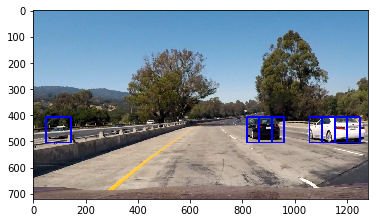

In [7]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

with open("model.p", "rb") as f:
    color_space, orient, pix_per_cell, cell_per_block, hog_channel, spatial_size, hist_bins, hist_range, spatial_feat, hist_feat, hog_feat, svc, X_scaler = pickle.load(f)


image = mpimg.imread('test_images/test1.jpg')
window_img = process(image)
plt.imshow(window_img)

# Video Processing

In [ ]:
from moviepy.editor import VideoFileClip

clip1 = VideoFileClip("project_video.mp4")
clip2 = clip1.subclip(15,20).fl_image(process)
clip2.write_videofile("../output/project_video.mp4", audio=False)
